In [1]:
#importing pandas library and loading the datasets
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from matplotlib import pyplot as plt
dm1 = pd.read_csv('dm1.csv') #dataset1 is loaded
dm2 = pd.read_csv('dm2.csv') #dataset2 is loaded

In [2]:
#Data normalization-We have to normalize the dataset which is present in the Numpy array.
#Normalization could be done using the below formula.
data1 = (dm1 - dm1.min()) / (dm1.max() / dm1.min())
data2 = (dm2 - dm2.min()) / (dm2.max() / dm2.min())

In [3]:
#Scaling the data- We need to bring the object to the orijin. 
#So for that we are going to use StandardScaler Object as it helps in shifting the mean towards the orijin
from sklearn.preprocessing import StandardScaler
scaled_data1 = StandardScaler().fit_transform(data1)
scaled_data2 = StandardScaler().fit_transform(data2)

In [4]:
#Scalculating the principal components(PC1,PC2) for each dimensions as we dont know how many PC's are required
#We are importing decomposition and dataset modules for calculating the principal components
from sklearn import decomposition,datasets
pca1 = decomposition.PCA()
pca = PCA()
data_pca1 = pca.fit_transform(scaled_data1)
pca2 = decomposition.PCA()
data_pca2 = pca.fit_transform(scaled_data2)

In [5]:
#Finding the covariance_matrix for both the datasets
features1 = scaled_data1.T
covariance_matrix1 = np.cov(features1)
features2 = scaled_data2.T
covariance_matrix2 = np.cov(features2)

In [6]:
#Calculating Eigen_values and Eigen_Vectors for both the datasets
eig_vals1, eig_vecs1 = np.linalg.eig(covariance_matrix1)
eig_vals2, eig_vecs2 = np.linalg.eig(covariance_matrix2)
#eig_vals[0] / sum(eig_vals)

In [7]:
#Selecting the highest 2 eigen vectors(PC1,PC2)
eig_vec1 = eig_vecs1[:,:2]
eig_vec1
#converting into matrox 
df_mat = np.asmatrix(data1)

#Transforming the top 2 highest eigen vectors into new subspace
eig_vecs1 = pd.DataFrame(np.real(eig_vec1))
trans = df_mat.dot(eig_vecs1)
trans.shape


(999, 2)

In [8]:
#Final dataframe of reduced dimentions which has only highest 2 Eigen Vectors
final_df = np.hstack(trans)
final_df = pd.DataFrame(trans)
final_df

,0,1
0,-0.176311,-0.013429
1,-0.032563,-0.001632
2,-0.008662,0.000874
3,-0.035647,-0.000055
4,-0.173640,0.002387
5,-0.127471,-0.014893
6,-0.200102,-0.004719
7,-0.057873,-0.003011
8,-0.142266,0.018934
9,-0.005932,0.000056


In [9]:
#Variation of Principal component
var1 = eig_vals1 / (100-1)
var2 = eig_vals2 / (100-1)
var1

array([0.41030371, 0.01219849, 0.01164093, 0.01132744, 0.01105175,
       0.01078393, 0.01037984, 0.01025657, 0.01009149, 0.0099344 ,
       0.00986637, 0.00963308, 0.00944824, 0.00926863, 0.009335  ,
       0.00898164, 0.00869062, 0.00874168, 0.00875713, 0.00855922,
       0.00838612, 0.00827464, 0.00235988, 0.00248671, 0.00252402,
       0.00816446, 0.00814744, 0.00800937, 0.00791069, 0.00781436,
       0.00766047, 0.00775002, 0.00266103, 0.00262883, 0.00751797,
       0.00269141, 0.00282085, 0.00740041, 0.0072836 , 0.00724134,
       0.00712408, 0.00294297, 0.00297751, 0.00301114, 0.00689699,
       0.00691962, 0.00677505, 0.00680569, 0.00671987, 0.00661224,
       0.00312549, 0.00319412, 0.00318468, 0.00327779, 0.00331146,
       0.0065072 , 0.00636268, 0.00632285, 0.00345295, 0.00348865,
       0.00625047, 0.00360905, 0.0036179 , 0.00613557, 0.00607666,
       0.0060471 , 0.00599699, 0.00586404, 0.0057973 , 0.00372603,
       0.00379904, 0.00565565, 0.00517519, 0.00530695, 0.00559

In [10]:
#Percentage for variation for each PC 
total_var1 = 0
for i in var1:
    total_var1 = total_var1 + i
percent1 = (var1 / total_var1) *100

total_var2 = 0
for i in var2:
    total_var2 = total_var2 + i
percent2 = (var2 / total_var2) *100
percent2

array([49.1261388 ,  0.91067388,  0.8962122 ,  0.86573661,  0.84963144,
        0.83687257,  0.8268215 ,  0.80923703,  0.80261814,  0.79320682,
        0.78320482,  0.77475848,  0.75359821,  0.74124617,  0.73636388,
        0.73144506,  0.23580688,  0.70432895,  0.24479649,  0.25340167,
        0.25593238,  0.69886128,  0.69542163,  0.68885654,  0.68580337,
        0.67547131,  0.67024576,  0.26397381,  0.66549633,  0.2704028 ,
        0.27397556,  0.65444326,  0.64767415,  0.28092833,  0.64025133,
        0.28570999,  0.29102438,  0.29434771,  0.62642211,  0.62210235,
        0.61844363,  0.2980982 ,  0.30094697,  0.30321899,  0.61305218,
        0.31141469,  0.31754221,  0.60368087,  0.59911285,  0.32567934,
        0.59272155,  0.33527002,  0.34139566,  0.34001699,  0.58108894,
        0.57314741,  0.56964113,  0.56345531,  0.57507317,  0.34594131,
        0.34518272,  0.35367734,  0.55236078,  0.54985473,  0.36288798,
        0.54295092,  0.53529308,  0.36957998,  0.373073  ,  0.37

In [11]:
#PC works well if it accounts to 70% or more which accounts to 70% of accuracy.
#We would now calculate the principal components that would give 70% of the variation
x = 0
principal_component1 = []
for i in percent1:
    if(x<=70.00):
        x = x + i
        principal_component1.append(i)
print(str(len(principal_component1)))

39


           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -6.495200  0.442357 -0.921216  1.789400 -2.261773  0.552506 -3.258846   
1     8.557755 -0.243799  0.203102 -0.137865 -0.040493  0.147888  0.057380   
2    10.864984  0.081617  0.115244 -0.132699 -0.014930 -0.017476  0.027332   
3     8.351963  0.126139 -0.106720 -0.161508 -0.049599 -0.116915  0.130681   
4    -6.482561  0.282894 -0.427560  0.042631 -1.642905  1.745604 -0.773248   
5    -1.653576 -0.680711 -1.984111 -0.724406  0.119600  1.824032 -0.687417   
6    -8.782080 -0.538692 -1.661416  2.602500  1.521841  2.335874 -0.539287   
7     6.096339 -0.402273  0.205947  0.318830 -0.140915  0.530268  0.220279   
8    -2.506177  1.885171  0.161864 -1.743961  1.339681  0.721046 -0.879752   
9    11.155499  0.019816  0.072447 -0.026801  0.024918 -0.036507 -0.010750   
10   -9.749076 -2.127586 -0.669532 -4.530865 -2.391626  0.279562  1.035615   
11   -3.750941  0.437703 -0.478685 -0.389630  0.893703  2.538665

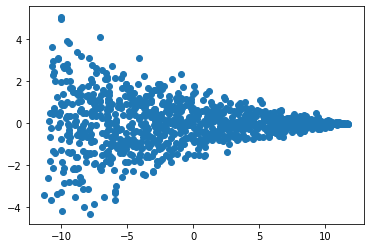

In [12]:
#After dimentionality reduction for dataset1, the graph is plotted
per_var = np.round(pca.explained_variance_ratio_*100,decimals = 1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]
pca_df1 = pd.DataFrame(data_pca1,columns = labels)

print(pca_df1)
plt.scatter(pca_df1.PC1,pca_df1.PC2)
plt.show()

In [13]:
#PC works well if it accounts to 70% or more which accounts to 70% of accuracy.
#We would now calculate the principal components that would give 70% of the variation
x = 0
principal_component2 = []
for i in percent2:
    if(x<=70.00):
        x = x + i
        principal_component2.append(i)
print(str(len(principal_component2)))

34


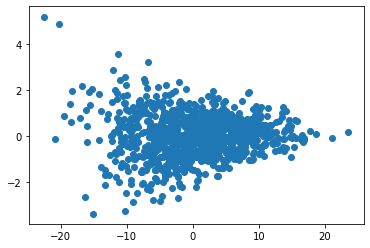

In [14]:
#After dimentionality reduction for dataset2, the graph is plotted
per_var2 = np.round(pca.explained_variance_ratio_*100,decimals = 1)
labels2 = ['PC' + str(x) for x in range(1,len(per_var2)+1)]
pca_df2 = pd.DataFrame(data_pca2,columns = labels)
plt.scatter(pca_df2.PC1,pca_df2.PC2)
plt.show()